In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [76]:
df = pd.read_excel('2022_IndePass_V1.xlsx')
df

,DateTime_UTC_7.00,Rain_in,AirTemp_F,RH_percent,SoilTemp_F,WaterCont_2in_m3m3,WaterCont_8in_m3m3,WaterCont_20in_m3m3,SnowDepth_in,WindSpeed_ms,WindGust_ms,WindDir_Degrees
0,2022-01-01 00:00:00,0.0,5.8118,92.5,NaN,0.110000,0.074823,0.105844,-888.890000,NaN,NaN,NaN
1,2022-01-01 01:00:00,0.0,2.0120,91.2,NaN,0.108301,0.074823,0.105844,-888.890000,NaN,NaN,NaN
2,2022-01-01 02:00:00,0.0,1.7096,91.1,NaN,0.107307,0.074823,0.105844,-888.890000,NaN,NaN,NaN
3,2022-01-01 03:00:00,0.0,1.4054,91.4,NaN,0.108301,0.074823,0.105844,-888.890000,NaN,NaN,NaN
4,2022-01-01 04:00:00,0.0,1.8608,91.1,NaN,0.108301,0.074823,0.105844,-888.890000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6456,2022-09-27 06:00:00,0.0,39.6896,52.4,43.7630,0.205654,0.098951,0.129110,49.648425,0.334,1.336,160.047
6457,2022-09-27 07:00:00,0.0,40.3448,50.2,43.3508,0.205654,0.098951,0.129110,49.340157,0.334,1.336,216.204
6458,2022-09-27 08:00:00,0.0,44.3102,47.5,43.0304,0.205654,0.098951,0.129110,48.971654,0.668,2.004,249.898
6459,2022-09-27 09:00:00,0.0,47.1992,41.9,42.7550,0.207641,0.098951,0.129110,49.370079,1.002,2.672,282.188


In [63]:
clean_df = df.fillna(0)
clean_df

,DateTime_UTC_7.00,Rain_in,AirTemp_F,RH_percent,SoilTemp_F,WaterCont_2in_m3m3,WaterCont_8in_m3m3,WaterCont_20in_m3m3,SnowDepth_in,WindSpeed_ms,WindGust_ms,WindDir_Degrees
0,2022-01-01 00:00:00,0.0,5.8118,92.5,0.0000,0.110000,0.074823,0.105844,-888.890000,0.000,0.000,0.000
1,2022-01-01 01:00:00,0.0,2.0120,91.2,0.0000,0.108301,0.074823,0.105844,-888.890000,0.000,0.000,0.000
2,2022-01-01 02:00:00,0.0,1.7096,91.1,0.0000,0.107307,0.074823,0.105844,-888.890000,0.000,0.000,0.000
3,2022-01-01 03:00:00,0.0,1.4054,91.4,0.0000,0.108301,0.074823,0.105844,-888.890000,0.000,0.000,0.000
4,2022-01-01 04:00:00,0.0,1.8608,91.1,0.0000,0.108301,0.074823,0.105844,-888.890000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
6456,2022-09-27 06:00:00,0.0,39.6896,52.4,43.7630,0.205654,0.098951,0.129110,49.648425,0.334,1.336,160.047
6457,2022-09-27 07:00:00,0.0,40.3448,50.2,43.3508,0.205654,0.098951,0.129110,49.340157,0.334,1.336,216.204
6458,2022-09-27 08:00:00,0.0,44.3102,47.5,43.0304,0.205654,0.098951,0.129110,48.971654,0.668,2.004,249.898
6459,2022-09-27 09:00:00,0.0,47.1992,41.9,42.7550,0.207641,0.098951,0.129110,49.370079,1.002,2.672,282.188


In [34]:
clean_df.dtypes

DateTime_UTC_7.00       object
Rain_in                float64
AirTemp_F              float64
RH_percent             float64
SoilTemp_F             float64
WaterCont_2in_m3m3     float64
WaterCont_8in_m3m3     float64
WaterCont_20in_m3m3    float64
SnowDepth_in           float64
WindSpeed_ms           float64
WindGust_ms            float64
WindDir_Degrees        float64
dtype: object

In [64]:
clean_df = clean_df.drop(labels=6460, axis=0)

In [65]:
clean_df['Date'] = pd.to_datetime(clean_df['DateTime_UTC_7.00'])
clean_df

,DateTime_UTC_7.00,Rain_in,AirTemp_F,RH_percent,SoilTemp_F,WaterCont_2in_m3m3,WaterCont_8in_m3m3,WaterCont_20in_m3m3,SnowDepth_in,WindSpeed_ms,WindGust_ms,WindDir_Degrees,Date
0,2022-01-01 00:00:00,0.0,5.8118,92.5,0.0000,0.110000,0.074823,0.105844,-888.890000,0.000,0.000,0.000,2022-01-01 00:00:00
1,2022-01-01 01:00:00,0.0,2.0120,91.2,0.0000,0.108301,0.074823,0.105844,-888.890000,0.000,0.000,0.000,2022-01-01 01:00:00
2,2022-01-01 02:00:00,0.0,1.7096,91.1,0.0000,0.107307,0.074823,0.105844,-888.890000,0.000,0.000,0.000,2022-01-01 02:00:00
3,2022-01-01 03:00:00,0.0,1.4054,91.4,0.0000,0.108301,0.074823,0.105844,-888.890000,0.000,0.000,0.000,2022-01-01 03:00:00
4,2022-01-01 04:00:00,0.0,1.8608,91.1,0.0000,0.108301,0.074823,0.105844,-888.890000,0.000,0.000,0.000,2022-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6455,2022-09-27 05:00:00,0.0,40.5320,55.6,44.1266,0.205654,0.098089,0.129110,49.031890,0.668,1.336,150.220,2022-09-27 05:00:00
6456,2022-09-27 06:00:00,0.0,39.6896,52.4,43.7630,0.205654,0.098951,0.129110,49.648425,0.334,1.336,160.047,2022-09-27 06:00:00
6457,2022-09-27 07:00:00,0.0,40.3448,50.2,43.3508,0.205654,0.098951,0.129110,49.340157,0.334,1.336,216.204,2022-09-27 07:00:00
6458,2022-09-27 08:00:00,0.0,44.3102,47.5,43.0304,0.205654,0.098951,0.129110,48.971654,0.668,2.004,249.898,2022-09-27 08:00:00


In [66]:
clean_df['SnowDepth_in'] = clean_df['SnowDepth_in'].clip(lower=0)
clean_df

,DateTime_UTC_7.00,Rain_in,AirTemp_F,RH_percent,SoilTemp_F,WaterCont_2in_m3m3,WaterCont_8in_m3m3,WaterCont_20in_m3m3,SnowDepth_in,WindSpeed_ms,WindGust_ms,WindDir_Degrees,Date
0,2022-01-01 00:00:00,0.0,5.8118,92.5,0.0000,0.110000,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 00:00:00
1,2022-01-01 01:00:00,0.0,2.0120,91.2,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 01:00:00
2,2022-01-01 02:00:00,0.0,1.7096,91.1,0.0000,0.107307,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 02:00:00
3,2022-01-01 03:00:00,0.0,1.4054,91.4,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 03:00:00
4,2022-01-01 04:00:00,0.0,1.8608,91.1,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6455,2022-09-27 05:00:00,0.0,40.5320,55.6,44.1266,0.205654,0.098089,0.129110,49.031890,0.668,1.336,150.220,2022-09-27 05:00:00
6456,2022-09-27 06:00:00,0.0,39.6896,52.4,43.7630,0.205654,0.098951,0.129110,49.648425,0.334,1.336,160.047,2022-09-27 06:00:00
6457,2022-09-27 07:00:00,0.0,40.3448,50.2,43.3508,0.205654,0.098951,0.129110,49.340157,0.334,1.336,216.204,2022-09-27 07:00:00
6458,2022-09-27 08:00:00,0.0,44.3102,47.5,43.0304,0.205654,0.098951,0.129110,48.971654,0.668,2.004,249.898,2022-09-27 08:00:00


In [52]:
clean_df.drop_duplicates()

,DateTime_UTC_7.00,Rain_in,AirTemp_F,RH_percent,SoilTemp_F,WaterCont_2in_m3m3,WaterCont_8in_m3m3,WaterCont_20in_m3m3,SnowDepth_in,WindSpeed_ms,WindGust_ms,WindDir_Degrees
0,2022-01-01 00:00:00,0.0,5.8118,92.5,0.0000,0.110000,0.074823,0.105844,0.000000,0.000,0.000,0.000
1,2022-01-01 01:00:00,0.0,2.0120,91.2,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000
2,2022-01-01 02:00:00,0.0,1.7096,91.1,0.0000,0.107307,0.074823,0.105844,0.000000,0.000,0.000,0.000
3,2022-01-01 03:00:00,0.0,1.4054,91.4,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000
4,2022-01-01 04:00:00,0.0,1.8608,91.1,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
6456,2022-09-27 06:00:00,0.0,39.6896,52.4,43.7630,0.205654,0.098951,0.129110,49.648425,0.334,1.336,160.047
6457,2022-09-27 07:00:00,0.0,40.3448,50.2,43.3508,0.205654,0.098951,0.129110,49.340157,0.334,1.336,216.204
6458,2022-09-27 08:00:00,0.0,44.3102,47.5,43.0304,0.205654,0.098951,0.129110,48.971654,0.668,2.004,249.898
6459,2022-09-27 09:00:00,0.0,47.1992,41.9,42.7550,0.207641,0.098951,0.129110,49.370079,1.002,2.672,282.188


In [67]:
clean_df.dtypes

DateTime_UTC_7.00              object
Rain_in                       float64
AirTemp_F                     float64
RH_percent                    float64
SoilTemp_F                    float64
WaterCont_2in_m3m3            float64
WaterCont_8in_m3m3            float64
WaterCont_20in_m3m3           float64
SnowDepth_in                  float64
WindSpeed_ms                  float64
WindGust_ms                   float64
WindDir_Degrees               float64
Date                   datetime64[ns]
dtype: object

In [68]:
wx_df = clean_df.drop(columns=['DateTime_UTC_7.00'])
wx_df

,Rain_in,AirTemp_F,RH_percent,SoilTemp_F,WaterCont_2in_m3m3,WaterCont_8in_m3m3,WaterCont_20in_m3m3,SnowDepth_in,WindSpeed_ms,WindGust_ms,WindDir_Degrees,Date
0,0.0,5.8118,92.5,0.0000,0.110000,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 00:00:00
1,0.0,2.0120,91.2,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 01:00:00
2,0.0,1.7096,91.1,0.0000,0.107307,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 02:00:00
3,0.0,1.4054,91.4,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 03:00:00
4,0.0,1.8608,91.1,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
6455,0.0,40.5320,55.6,44.1266,0.205654,0.098089,0.129110,49.031890,0.668,1.336,150.220,2022-09-27 05:00:00
6456,0.0,39.6896,52.4,43.7630,0.205654,0.098951,0.129110,49.648425,0.334,1.336,160.047,2022-09-27 06:00:00
6457,0.0,40.3448,50.2,43.3508,0.205654,0.098951,0.129110,49.340157,0.334,1.336,216.204,2022-09-27 07:00:00
6458,0.0,44.3102,47.5,43.0304,0.205654,0.098951,0.129110,48.971654,0.668,2.004,249.898,2022-09-27 08:00:00


TypeError: cannot perform __pow__ with this index type: DatetimeArray

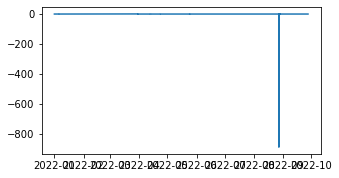